In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

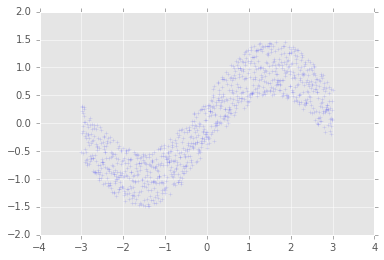

In [2]:
n_observations = 1000
sess = tf.InteractiveSession()
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [3]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

In [4]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')

Y_pred = X * W + B

In [5]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

cost = tf.reduce_mean(distance(Y_pred, Y))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

1.01035
0.9335
0.85971
0.790205
0.726453
0.668433
0.618042
0.574462
0.536996
0.506019
0.480401
0.459978
0.445222
0.433505
0.424904
0.418366
0.412835
0.408835
0.406096
0.404251
0.403008
0.402174
0.401624
0.401252
0.401015
0.400872
0.400757
0.400686
0.400631
0.400583
0.400541
0.40052
0.400504
0.40049
0.400483
0.400476
0.400469
0.400462
0.400457
0.400456
0.400454
0.400452
0.400451
0.400449
0.400447
0.400446
0.400445
0.400445
0.400445
0.400445


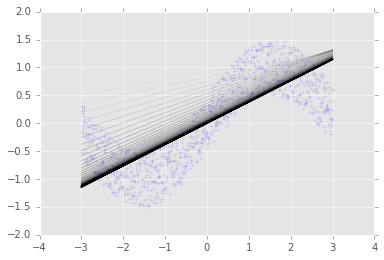

In [8]:

n_iterations = 500
batch_size = 1000

fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)